<font size = 6>

# Подбор модельного распределения

**Выполнил:** Асаевич Никита Сергеевич, MMM-401-06


# Введение

Цель данной работы заключается в исследовании и подборе подходящих статистических распределений для заданного набора данных. Мы используем различные методы для выбора наиболее подходящего распределения и проверки его соответствия. В процессе работы были сформированы данные, включающие столбец с номером варианта, и применены методы для анализа распределений.

Процедура формирования данных включает в себя импорт данных из CSV-файла, извлечение нужных столбцов и применение статистических методов для проверки распределений.


## Формирование данных

Подключаем необходимые библиотеки

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Импортируем данные из файла в переменну **ds0**

In [43]:
ds0 = pd.read_csv('AmD. ds1.csv')
print(ds0.head())

        v01       v02       v03       v04       v05       v06       v07  \
0  0.588537  0.266063  0.099609  0.106528  0.569969  0.343637  0.090716   
1  0.523795  0.068104  0.104946  0.092111  0.520028  0.071031  0.053717   
2  0.464348  0.548769  0.059158  0.107409  0.564153  0.464908  0.012882   
3  0.558171  0.718258  0.013367  0.065828  0.394804  0.000019  0.043117   
4  0.530324  0.332362  0.052429  0.081134  0.529610  0.268147  0.009952   

        v08       v09       v10  ...       v31       v32       v33       v34  \
0  0.109331  0.516400  0.997077  ...  0.100889  0.077385  0.439513  0.806546   
1  0.069821  0.551381  0.939712  ...  0.057796  0.078285  0.501076  0.996275   
2  0.090064  0.482337  0.174346  ...  0.038450  0.100636  0.524041  0.863091   
3  0.083786  0.473056  0.023972  ...  0.047434  0.131571  0.510083  0.000080   
4  0.114642  0.450673  0.026899  ...  0.344527  0.104176  0.533659  0.200879   

        v35       v36       v37       v38       v39       v40  
0  0

In [42]:
ds = ds0[['v01']].rename(columns={'v01': 's01'})
ds_list = ds['s01'].tolist()
print(ds_list[:10])

[0.588536824057658, 0.523795021331495, 0.464348084609632, 0.558170998969413, 0.530324345726256, 0.479850113993618, 0.575606479295492, 0.490788590601833, 0.412963324431192, 0.432717636720376]


# Выбор подходящих распределений

Подключаем библиотеку **fitter**

In [41]:
from fitter import Fitter

Выводим результаты поиска подходящих распределений

2024-09-05 17:43:57.103 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted anglit distribution with error=2109.536513)
2024-09-05 17:43:57.131 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted alpha distribution with error=230.656802)
2024-09-05 17:43:57.134 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted arcsine distribution with error=1821.597686)
2024-09-05 17:43:57.185 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=406.381181)
2024-09-05 17:43:57.227 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=233.13155)
2024-09-05 17:43:57.240 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted argus distribution with error=612.279904)
2024-09-05 17:43:57.244 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr12 distribution with error=221.092875)
2024-09-05 17:43:57.248 | INFO     | fitter.fitter:_fit_single_distribution:33

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gausshyper,204.727114,-155.619698,-130.332049,inf,0.017855,0.996485
johnsonsb,204.794029,-157.951285,-141.092853,inf,0.017537,0.997266
gennorm,205.778349,-150.546715,-137.902891,inf,0.020665,0.980302
beta,205.897869,-161.154985,-144.296553,inf,0.018699,0.993575
tukeylambda,206.402332,-159.742233,-147.098409,inf,0.021492,0.971238


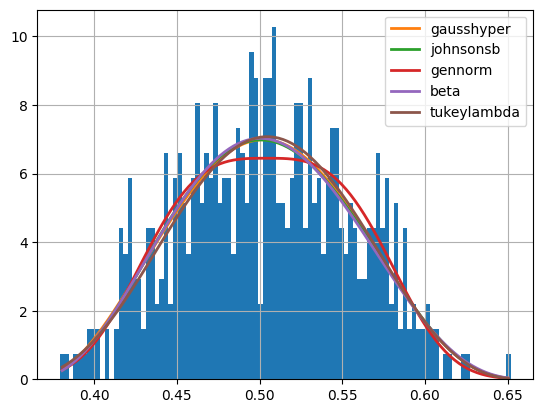

In [46]:
ftd01 = Fitter(ds_list)
ftd01.fit()

# Выводим результаты поиска подходящих распределений
ftd01.summary()

# Проверка с помощью теста

Извлечем параметры распределений, которые были определены ранее, и применим тест Колмогорова-Смирнова для проверки соответствия распределений данным. Этот тест позволяет оценить, насколько хорошо распределение описывает наши данные.

In [45]:
from scipy.stats import kstest

# Извлекаем параметры распределений
fd_params_gausshyper = ftd01.fitted_param['gausshyper']
fd_params_johnsonsb = ftd01.fitted_param['johnsonsb']
fd_params_gennorm = ftd01.fitted_param['gennorm']
fd_params_beta = ftd01.fitted_param['beta']
fd_params_tukeylambda = ftd01.fitted_param['tukeylambda']

In [47]:
# Проверка для gausshyper
stat_gausshyper, p_value_gausshyper = kstest(ds_list, 'gausshyper', args=fd_params_gausshyper)
print(f'KS Test for gausshyper: statistic={stat_gausshyper}, p-value={p_value_gausshyper}')

KS Test for gausshyper: statistic=0.017855421894927836, p-value=0.9964853387455432


P-значение p-value больше уровня значимости 0.05, поэтому гипотеза о том, что проверяемое распределение исследуемой переменной характеристики генеральной совокупности является бета-распределением не отвергается.

In [48]:
# Проверка для johnsonsb
stat_johnsonsb, p_value_johnsonsb = kstest(ds_list, 'johnsonsb', args=fd_params_johnsonsb)
print(f'KS Test for johnsonsb: statistic={stat_johnsonsb}, p-value={p_value_johnsonsb}')


KS Test for johnsonsb: statistic=0.017537077555849767, p-value=0.9972663061744738


P-значение p-value больше уровня значимости 0.05, поэтому гипотеза о том, что проверяемое распределение исследуемой переменной характеристики генеральной совокупности является бета-распределением не отвергается.

In [51]:
# Проверка для gennorm
stat_gennorm, p_value_gennorm = kstest(ds_list, 'gennorm', args=fd_params_gennorm)
print(f'KS Test for gennorm: statistic={stat_gennorm}, p-value={p_value_gennorm}')


KS Test for gennorm: statistic=0.020664653496300867, p-value=0.9803017021675491


P-значение p-value больше уровня значимости 0.05, поэтому гипотеза о том, что проверяемое распределение исследуемой переменной характеристики генеральной совокупности является бета-распределением не отвергается.

In [49]:
# Проверка для beta
stat_beta, p_value_beta = kstest(ds_list, 'beta', args=fd_params_beta)
print(f'KS Test for beta: statistic={stat_beta}, p-value={p_value_beta}')


KS Test for beta: statistic=0.018699308625567013, p-value=0.993574665115196


P-значение p-value больше уровня значимости 0.05, поэтому гипотеза о том, что проверяемое распределение исследуемой переменной характеристики генеральной совокупности является бета-распределением не отвергается.

In [50]:
# Проверка для tukeylambda
stat_tukeylambda, p_value_tukeylambda = kstest(ds_list, 'tukeylambda', args=fd_params_tukeylambda)
print(f'KS Test for tukeylambda: statistic={stat_tukeylambda}, p-value={p_value_tukeylambda}')


KS Test for tukeylambda: statistic=0.021492033409155953, p-value=0.9712377625585126


P-значение p-value больше уровня значимости 0.05, поэтому гипотеза о том, что проверяемое распределение исследуемой переменной характеристики генеральной совокупности является бета-распределением не отвергается.

## Визуализация выбранных распределений

Построим диаграмму с кривыми всех выбранных распределений, используя метод
**plot_pdf**.

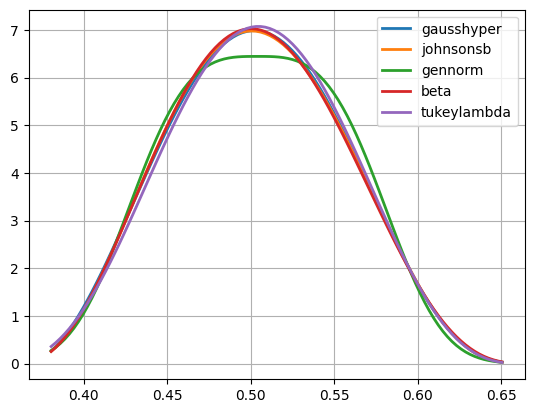

In [56]:
# Построение диаграммы с кривыми выбранных распределений
ftd01.plot_pdf(names=['gausshyper', 'johnsonsb', 'gennorm', 'beta', 'tukeylambda'])

# Отображение диаграммы
plt.show()

**gennorm** распределение отличается от прочих, что означает, что оно меньше прочих подходит для описания данных, нежели прочие.

С помощью функции **subplot** пакета **matplotlib.pyplot** и функции probplot пакета stats
построим вероятностные графики (диаграммы P-P) для всех выбранных распределений.

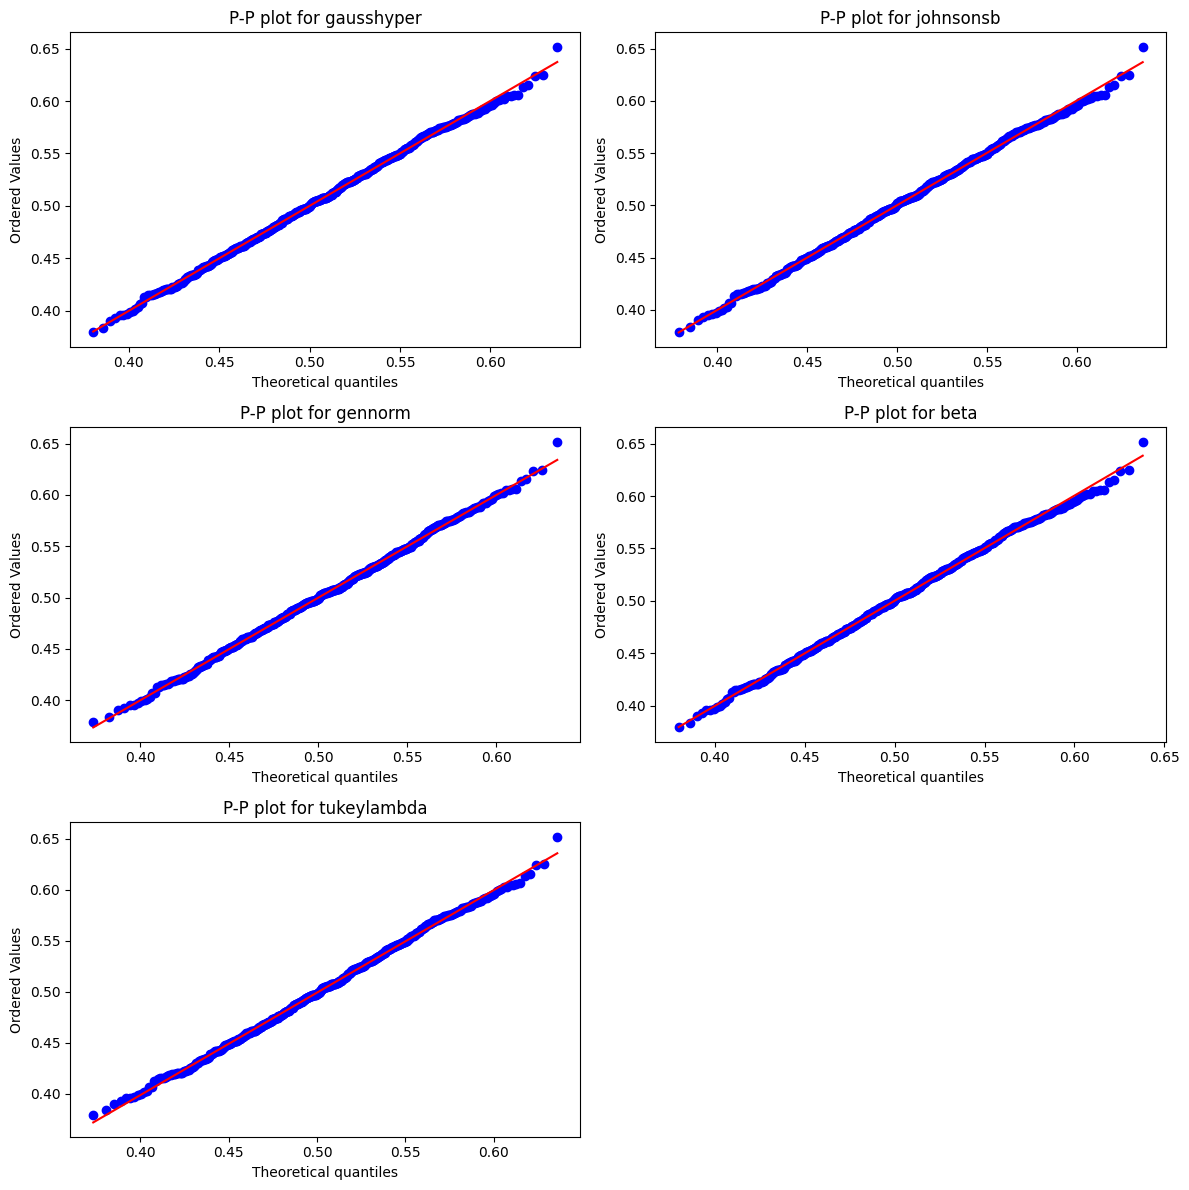

In [52]:

# Создаем subplot для P-P диаграмм
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# P-P диаграммы для каждого распределения
stats.probplot(ds_list, dist="gausshyper", sparams=fd_params_gausshyper, plot=axs[0, 0])
axs[0, 0].set_title("P-P plot for gausshyper")

stats.probplot(ds_list, dist="johnsonsb", sparams=fd_params_johnsonsb, plot=axs[0, 1])
axs[0, 1].set_title("P-P plot for johnsonsb")

stats.probplot(ds_list, dist="gennorm", sparams=fd_params_gennorm, plot=axs[1, 0])
axs[1, 0].set_title("P-P plot for gennorm")

stats.probplot(ds_list, dist="beta", sparams=fd_params_beta, plot=axs[1, 1])
axs[1, 1].set_title("P-P plot for beta")

stats.probplot(ds_list, dist="tukeylambda", sparams=fd_params_tukeylambda, plot=axs[2, 0])
axs[2, 0].set_title("P-P plot for tukeylambda")

# Удаляем лишнюю ось
fig.delaxes(axs[2, 1])

# Отображение графиков
plt.tight_layout()
plt.show()

График вероятность-вероятность. точки вероятностного графика распределены вдоль биссектрисы, т.е выборочные вероятности совпадают с теоретическими вероятностями, поэтому проверяемое распределение может подходить для описания исследуемой характеристики.

# Заключение